In [3]:
import pandas as pd

# Read the data
data = pd.read_csv('news_sample_processed.csv', index_col=0)

###Stats###

In [28]:
def count_word_freq(text_list, word):
    count = 0
    for row in text_list:
        count += row.count(word)
    return count


In [29]:
print('there are {} urls in the dataset'.format(count_word_freq(data['cleaned_content'], '<url>')))
print('there are {} numeric values in the dataset'.format(count_word_freq(data['cleaned_content'], '<num>')))


there are 243 urls in the dataset
there are 2378 numeric values in the dataset


In [90]:
import re
def content_word_frequency_counter(data):
    all_text = ' '.join(data['cleaned_content'])
    all_words = re.findall('\s[^\s]+\s',all_text)
    word_dict = {}
    for word in all_words:
        if word.strip() in word_dict:
            word_dict[word.strip()] += 1
        else:
            word_dict[word.strip()] = 1
    word_dict = {word: freq for word, freq in sorted(word_dict.items(), key = lambda ele: ele[1], reverse=True)}
    return word_dict

In [91]:
word_dict = content_word_frequency_counter(data)

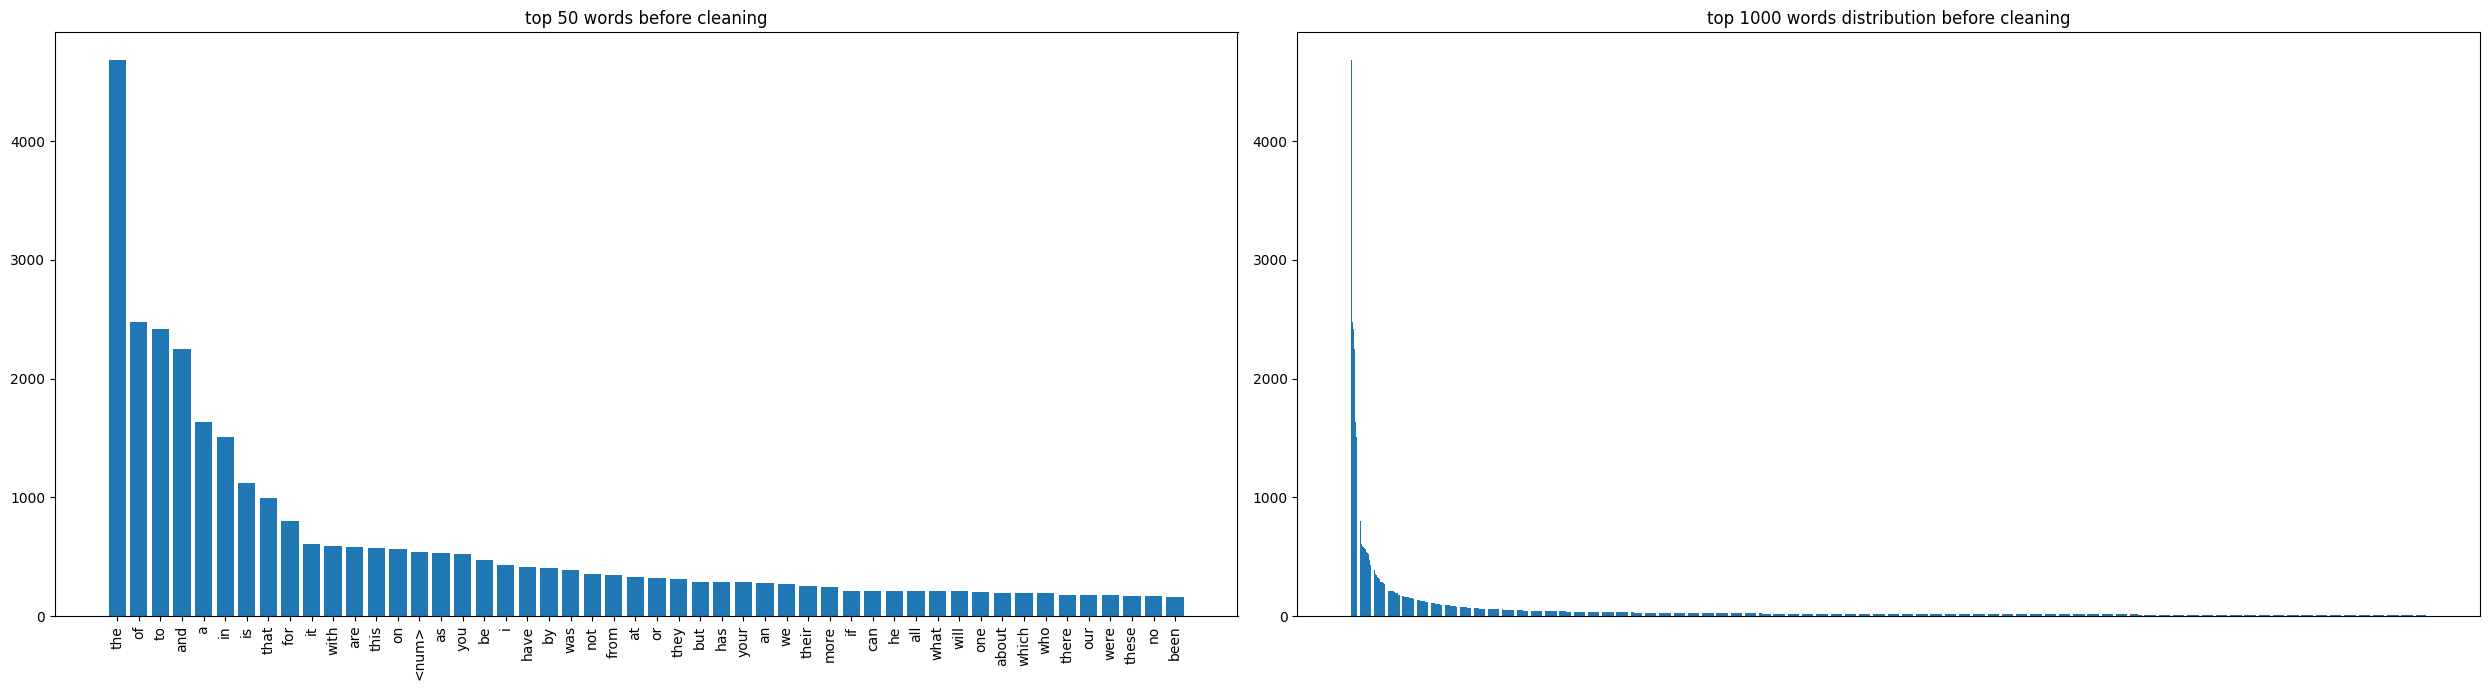

In [94]:
import matplotlib.pyplot as plt

words_t50, frequency_t50 = zip(*list(word_dict.items())[:50])
words_t1000, frequency_t1000 = zip(*list(word_dict.items())[:1000])

plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
plt.bar(words_t50, frequency_t50)
plt.xticks(rotation=90)
plt.title('top 50 words before cleaning')

plt.subplot(1, 2, 2)
plt.bar(words_t1000, frequency_t1000)
plt.xticks([])
plt.title('top 1000 words distribution before cleaning')

plt.tight_layout()
plt.show()

In [86]:
import ast
def token_word_frequency_counter(data):
    all_tokens = []

    for row in data['processed_content']:
        row = ast.literal_eval(row)
        all_tokens.append(row)
    
    token_dict = {}
    for sublist in all_tokens:
        for token in sublist:
            if token in token_dict:
                token_dict[token] += 1
            else:
                token_dict[token] = 1
    token_dict = {word: freq for word, freq in sorted(token_dict.items(), key = lambda ele: ele[1], reverse=True)}
    return token_dict

token_dict = token_word_frequency_counter(data)

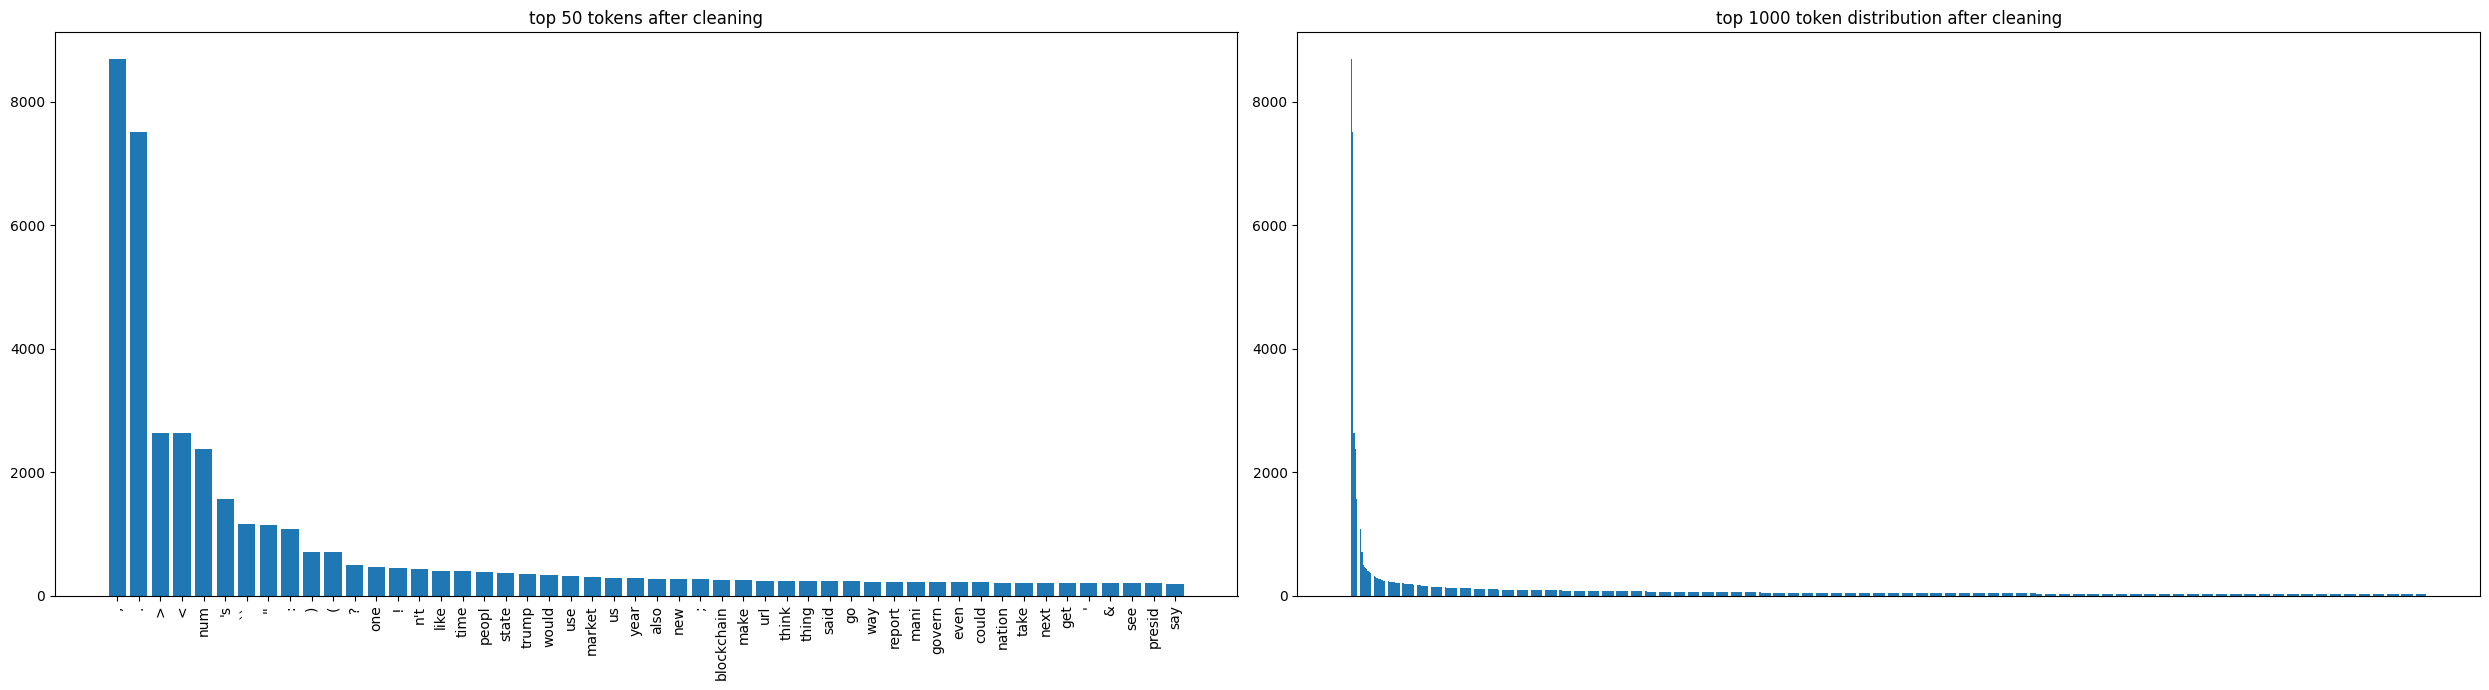

In [96]:

tokens_t50, frequency_t50 = zip(*list(token_dict.items())[:50])
tokens_t1000, frequency_t1000 = zip(*list(token_dict.items())[:1000])

plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
plt.bar(tokens_t50, frequency_t50)
plt.xticks(rotation=90)
plt.title('top 50 tokens after cleaning')

plt.subplot(1, 2, 2)
plt.bar(tokens_t1000, frequency_t1000)
plt.xticks([])
plt.title('top 1000 token distribution after cleaning')

plt.tight_layout()
plt.show()

It seems that the punctuation is disproportionaltly represented in the tokized version of the article contents. As every article whether fake or real will inevitably contain punctuation, is it really significant for our analysis?
It also seems that Trump is the only named entity.
Other interesting nouns include: govern(ment), presid(ent), blockchain, market-

It seems that the most frequent 1000 tokens drop off in frequceny much more quickly than the most frequent 1000 words. We believe this is because the most frequent 1000 words are mostly stop words, which are removed in the tokenization process.